In [6]:
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, "..\\scripts\\")
import test
sys.path.insert(0, "..\\scripts\\")
import taxis_analysis as MyFn
import matplotlib.pyplot as plt


if "__main__" == __name__:
    df = MyFn.load_dataset()
    
    distance_profit_analysis = (df.pipe(MyFn.distance_group_column)
    .pipe(MyFn.calculate_work_hours)
    .pipe(MyFn.calculate_gasoline_consumption)
    .pipe(MyFn.calculate_auto_utilization)
    .pipe(MyFn.group_by_distance)
    .pipe(MyFn.calculate_total_profit)
    .pipe(MyFn.calculate_profit_by_hour)
    )

In [10]:
import matplotlib
import seaborn as sns

matplotlib.use("TkAgg")
import matplotlib.pyplot as plt

import sys

sys.path.append(".\\scripts\\")
import load_and_save_data as Data
import data_procedures as DPro
import calculate as calc
import visualisations as vs

df = Data.load_data_frame(month="03")
df = (
    df.pipe(DPro.rename_columns)
    .pipe(DPro.join_zones)
    .pipe(DPro.join_payment_type)
    .pipe(DPro.drop_unnecessary_columns)
)


df = DPro.filtered_by_date(df)
#
general_dataframe = (
    df.pipe(DPro.add_week_day)
    .pipe(DPro.get_time_groups)
    .pipe(DPro.group_by_time_weekdays)
    .pipe(calc.calculate_passengers_fare_index)
)
#
#
#vs.show_heatmap(general_dataframe, by="tip")
#plt.show(block=True)


In [11]:
general_dataframe

,week_day,3h_interval,VendorID,passenger,distance,fare,extra,mta_tax,tip,tolls,improvement_surcharge,total,congestion_surcharge,airport_fee
0,Friday,00-03,47728,37757.0,140462.36,378611.10,29208.00,13223.80,72384.20,8542.27,8029.8,557541.07,59853.00,2155.00
1,Friday,03-06,14394,9946.0,165282.43,159241.52,8330.30,3903.50,27840.90,9446.86,2428.8,224267.68,16120.00,646.25
2,Friday,06-09,73227,52739.0,355772.19,640939.46,30461.80,21074.00,117296.30,30157.98,12768.6,921726.24,90400.00,3657.50
3,Friday,09-12,114270,87411.0,208943.53,935682.83,47092.35,32981.50,169851.63,37343.29,19929.6,1355305.55,150468.00,5035.00
4,Friday,12-15,140073,109417.0,663813.48,1185763.06,59956.60,40324.14,214021.84,49486.99,24396.9,1709274.68,184115.00,6485.00
5,Friday,15-18,162505,128763.0,619205.45,1434383.72,139627.17,46712.46,271386.55,54904.98,28278.9,2132326.18,210985.00,8230.00
6,Friday,18-21,179584,143915.0,823674.63,1362845.49,162429.55,51459.10,274700.58,38462.55,31041.0,2100806.37,234967.50,7220.00
7,Friday,21-24,97039,81773.0,216236.08,744754.52,61292.05,27503.80,149221.60,19883.68,16573.2,1118790.95,126630.50,4597.50
8,Monday,00-03,20464,15727.0,74469.38,244402.26,11905.50,5646.50,41816.12,11204.65,3445.2,337865.68,21790.00,3901.25
9,Monday,03-06,9116,6445.0,500566.24,111911.78,5173.50,2527.80,17534.51,7197.74,1556.7,153885.03,9658.00,720.00


<AxesSubplot:title={'center':'by_passengers'}, xlabel='3h_interval', ylabel='week_day'>

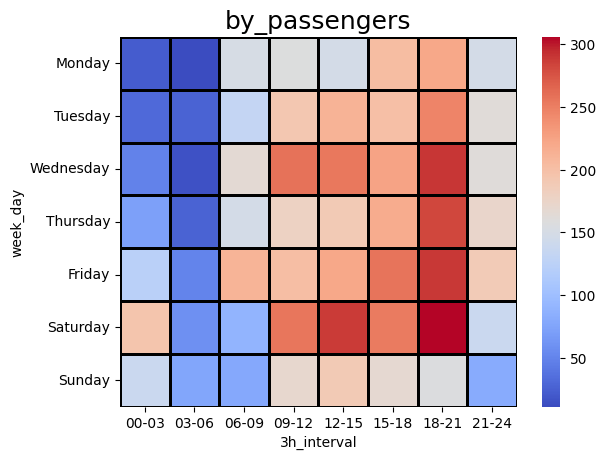

In [33]:
MyFn.visualisation(general_dataframe, by = 'passengers', visual=True)

In [8]:
import sys
sys.path.append("..\\scripts\\")

import load_and_save_data as Data
import data_procedures as DPro
import calculate as calc

df = Data.load_data_frame(month='03')

df = (df.pipe(DPro.rename_columns)
      .pipe(DPro.join_zones)
      .pipe(DPro.join_payment_type)
      .pipe(DPro.drop_unnecessary_columns)
      
      )

#df = DPro.filtered_by_date(df, date_range=("2022-01-01","2022-01-02"))
df = DPro.distance_group_column(df)

distance_profit_analysis = (df.pipe(DPro.distance_group_column)
    .pipe(calc.calculate_work_hours)
    .pipe(calc.calculate_gasoline_consumption)
    .pipe(calc.calculate_auto_utilization)
    .pipe(DPro.group_by_distance)
    .pipe(calc.calculate_total_profit)
    .pipe(calc.calculate_profit_by_hour)
    )

